<a href="https://colab.research.google.com/github/Bruce-159/-Pattern-recognition-HW/blob/main/HW03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [28]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[ 0.04887278]
 [-0.75193083]
 [-0.98590314]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.67591345]
 [0.11991429]
 [0.8748462 ]], shape=(3, 1), dtype=float32)


In [29]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

In [30]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(f'random tensor :\n {v}')

v.assign(tf.ones((3, 1)))
print(f'ones tensor :\n {v}')

v[0, 0].assign(3.)
print(f'modify tensor[0,0]:\n{v}')

v.assign_add(tf.ones((3, 1)))
print(f'add other tensor to v add(ones,v):\n{v}')

random tensor :
 <tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.02877  ],
       [1.090465 ],
       [2.3219416]], dtype=float32)>
ones tensor :
 <tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>
modify tensor[0,0]:
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>
add other tensor to v add(ones,v):
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>


In [31]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b) 
e *= 2 
print(f'a:{a}\n b:{b}\nc:{c}\nd:{d}\ne:{e}')

a:[[1. 1.]
 [1. 1.]]
 b:[[1. 1.]
 [1. 1.]]
c:[[1. 1.]
 [1. 1.]]
d:[[2. 2.]
 [2. 2.]]
e:[[4. 4.]
 [4. 4.]]


In [32]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var) 
gradient = tape.gradient(result, input_var)
print(f'input:\n{input_var}\n gradient:\n{gradient}')

input:
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>
 gradient:
6.0


In [33]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [34]:
time = tf.Variable(2.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time) 
acceleration = outer_tape.gradient(speed, time)
speed,acceleration

(<tf.Tensor: shape=(), dtype=float32, numpy=19.6>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.8>)

In [35]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
negative_samples.shape,negative_samples,positive_samples

((1000, 2), array([[0.27397996, 4.07209283],
        [1.24364721, 3.22814056],
        [1.49042573, 4.43232306],
        ...,
        [1.04027455, 2.77179277],
        [1.03181527, 4.83345583],
        [0.20318197, 2.83501896]]), array([[ 2.70484132, -0.25083887],
        [ 2.89411918, -0.9700157 ],
        [ 2.04477072, -0.8069171 ],
        ...,
        [ 1.99515471, -0.24309965],
        [ 2.07136574, -0.96273627],
        [ 4.19623989,  0.73909307]]))

In [36]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
print(f'input size:{inputs.shape}\ninput data:{inputs}\n')
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
print(targets)

input size:(2000, 2)
input data:[[ 0.27397996  4.072093  ]
 [ 1.2436472   3.2281406 ]
 [ 1.4904257   4.432323  ]
 ...
 [ 1.9951547  -0.24309966]
 [ 2.0713658  -0.96273625]
 [ 4.19624     0.73909307]]

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


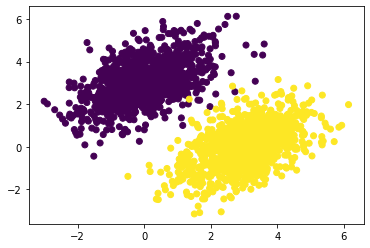

In [37]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [38]:

input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
c = tf.Variable(initial_value=tf.zeros(shape=(output_dim)))
b.shape,W.shape

(TensorShape([1]), TensorShape([2, 1]))

In [39]:

def model(inputs):
    return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss


Loss at step 0: 5.2356
Loss at step 1: 0.4924
Loss at step 2: 0.1764
Loss at step 3: 0.1235
Loss at step 4: 0.1093
Loss at step 5: 0.1014
Loss at step 6: 0.0948
Loss at step 7: 0.0889
Loss at step 8: 0.0835
Loss at step 9: 0.0785
Loss at step 10: 0.0740
Loss at step 11: 0.0699
Loss at step 12: 0.0661
Loss at step 13: 0.0626
Loss at step 14: 0.0595
Loss at step 15: 0.0566
Loss at step 16: 0.0539
Loss at step 17: 0.0515
Loss at step 18: 0.0493
Loss at step 19: 0.0472
Loss at step 20: 0.0454
Loss at step 21: 0.0437
Loss at step 22: 0.0421
Loss at step 23: 0.0407
Loss at step 24: 0.0394
Loss at step 25: 0.0382
Loss at step 26: 0.0371
Loss at step 27: 0.0361
Loss at step 28: 0.0351
Loss at step 29: 0.0343
Loss at step 30: 0.0335
Loss at step 31: 0.0328
Loss at step 32: 0.0322
Loss at step 33: 0.0316
Loss at step 34: 0.0311
Loss at step 35: 0.0306
Loss at step 36: 0.0301
Loss at step 37: 0.0297
Loss at step 38: 0.0293
Loss at step 39: 0.0290


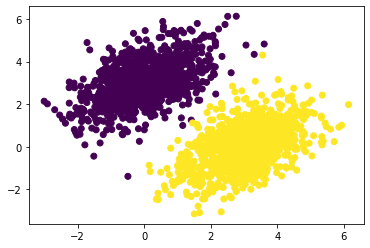

In [40]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

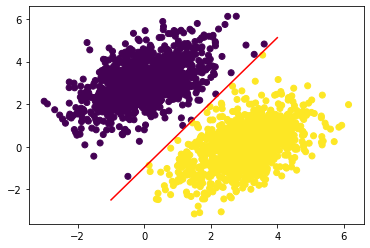

In [41]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

In [42]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [43]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [44]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

In [45]:
model = keras.Sequential([keras.layers.Dense(1)])


In [46]:
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [47]:

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [48]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)
history.history

Epoch 1/5
16/16 [==============================] - 0s 2ms/step - loss: 6.2775 - binary_accuracy: 0.8250
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 5.9883 - binary_accuracy: 0.8360
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 5.7489 - binary_accuracy: 0.8465
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 5.5220 - binary_accuracy: 0.8575
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 5.3023 - binary_accuracy: 0.8645


{'loss': [6.277489185333252,
  5.98830509185791,
  5.748870372772217,
  5.522033214569092,
  5.302313327789307],
 'binary_accuracy': [0.824999988079071,
  0.8360000252723694,
  0.8464999794960022,
  0.8575000166893005,
  0.8644999861717224]}

In [49]:

model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 4ms/step - loss: 0.3333 - binary_accuracy: 0.8857 - val_loss: 0.0603 - val_binary_accuracy: 1.0000
Epoch 2/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0713 - binary_accuracy: 0.9571 - val_loss: 0.0353 - val_binary_accuracy: 0.9917
Epoch 3/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0723 - binary_accuracy: 0.9529 - val_loss: 0.0291 - val_binary_accuracy: 0.9983
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0760 - binary_accuracy: 0.9543 - val_loss: 0.0275 - val_binary_accuracy: 0.9967
Epoch 5/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0746 - binary_accuracy: 0.9500 - val_loss: 0.0410 - val_binary_accuracy: 1.0000


In [50]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[ 0.82232046]
 [-0.0089654 ]
 [ 0.01804268]
 [-0.03286985]
 [-0.14771065]
 [-0.00198057]
 [ 1.3792003 ]
 [-0.32696125]
 [ 1.0510827 ]
 [ 0.9038239 ]]


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


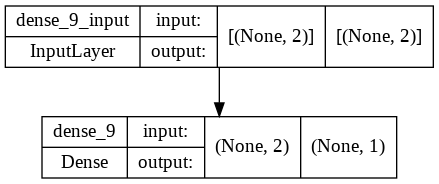

In [51]:
from tensorflow.keras.utils import plot_model
model.summary()

plot_model(model, 
    show_shapes= True,
    expand_nested=True
)